# Tutorial: Plotting Atomic Energy Levels

## Introduction

Atomic energy level plots are a powerful visualization tool in electronic structure analysis that display the discrete energy levels of specific atoms in a material. Unlike band structure plots that show dispersion across k-space, atomic level plots focus on **single k-point calculations** (typically the Γ-point) and reveal how electronic states are distributed in energy and localized on different atomic sites.

## What are Atomic Energy Levels?

### Physical Concept

In molecular and solid-state systems, electronic states can be understood as arising from the interaction and hybridization of atomic orbitals. When we perform electronic structure calculations at a single k-point (usually Γ), we obtain discrete energy levels that can be analyzed in terms of their:

- **Energy position**: Where the level lies relative to the Fermi energy
- **Atomic character**: Which atoms contribute most to each electronic state
- **Orbital character**: Which atomic orbitals (s, p, d, f) are involved

### When to Use Atomic Level Plots

Atomic level plots are particularly useful for:

1. **Molecular systems**: Understanding electronic structure of isolated molecules
2. **Γ-point calculations**: Analyzing electronic states at the zone center
3. **Defect studies**: Examining how defects introduce new energy levels
4. **Chemical bonding analysis**: Understanding which atoms participate in bonding
5. **Orbital hybridization**: Visualizing how atomic orbitals combine

### Key Features

- **Discrete levels**: Each horizontal line represents an electronic state
- **Color coding**: Indicates atomic contributions to each state
- **Energy axis**: Shows electronic energies relative to Fermi level
- **No k-dispersion**: Single k-point analysis (no band dispersion)

## System Overview: hBN with CNN Defect

In this tutorial, we'll analyze the electronic structure of **hexagonal boron nitride (hBN) with a CNN defect complex**. This system is interesting because:

- **Host material**: hBN is a wide-bandgap 2D material
- **Defect complex**: Carbon-nitrogen-nitrogen (CNN) creates localized states
- **Energy gap**: Defect states appear within the hBN bandgap
- **Atomic specificity**: Different atomic sites contribute differently to electronic states

Let's start by setting up our environment and downloading the necessary data.

## Setting up the Environment

In this section, we'll import the necessary libraries and download the example data for our atomic level analysis. We'll be working with a hexagonal boron nitride (hBN) system containing a CNN (carbon-nitrogen-nitrogen) defect complex.

### System Details

- **Material**: hBN with CNN defect
- **Calculation type**: Single k-point (Γ-point) calculation
- **DFT code**: VASP
- **Spin treatment**: Spin-polarized calculation
- **Focus atoms**: Specific atoms around the defect site

Let's import the required libraries and set up our data:

In [1]:
# Import required libraries
from pathlib import Path
import pyprocar
import numpy as np

# Setup data directories  
CURRENT_DIR = Path(".").resolve()
print(f"Current working directory: {CURRENT_DIR}")

# Download the atomic levels example data
ATOMIC_LEVELS_PATH = "data/examples/bands/atomic_levels"
pyprocar.download_from_hf(relpath=ATOMIC_LEVELS_PATH, output_path=CURRENT_DIR)

# Define data directory
HBNC2_DATA_DIR = CURRENT_DIR / ATOMIC_LEVELS_PATH / "hBN-CNCN"
HBNCNCN_DATA_DIR = CURRENT_DIR / ATOMIC_LEVELS_PATH / "hBN-CNCN"

print(f"HBNC2_DATA_DIR: {HBNC2_DATA_DIR}")
print(f"HBNCNCN_DATA_DIR: {HBNCNCN_DATA_DIR}")

Current working directory: C:\Users\lllang\Desktop\notebooks\Notebook\01 - Projects\Pyprocar\pyprocar\examples\00-band_structure


atomic_levels.zip:   0%|          | 0.00/779k [00:00<?, ?B/s]

HBNC2_DATA_DIR: C:\Users\lllang\Desktop\notebooks\Notebook\01 - Projects\Pyprocar\pyprocar\examples\00-band_structure\data\examples\bands\atomic_levels\hBN-CNCN
HBNCNCN_DATA_DIR: C:\Users\lllang\Desktop\notebooks\Notebook\01 - Projects\Pyprocar\pyprocar\examples\00-band_structure\data\examples\bands\atomic_levels\hBN-CNCN


c:\Users\lllang\miniconda3\envs\pyprocar\lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\lllang\.cache\huggingface\hub\datasets--lllangWV--pyprocar_test_data. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


## Understanding Atomic Mode in PyProcar

### What is Atomic Mode?

The `atomic` mode in PyProcar is specifically designed for visualizing electronic energy levels at a single k-point (typically Γ). Unlike regular band structure plots that show energy dispersion across k-space, atomic mode:

1. **Displays discrete energy levels**: Each horizontal line represents an electronic state
2. **Shows atomic contributions**: Color coding indicates which atoms contribute to each state
3. **Requires single k-point**: Usually a Γ-point calculation
4. **Provides level labels**: Automatically labels energy levels with band indices

### Key Parameters for Atomic Mode

- **`mode="atomic"`**: Activates the atomic level visualization
- **`atoms`**: List of atom indices to highlight and analyze
- **`elimit`**: Energy range to display (relative to Fermi level)
- **`clim`**: Color scale limits for atomic projections

### Selecting Atoms for Analysis

For the hBN-CNN system, we need to carefully select which atoms to analyze. The defect complex creates localized states, so we focus on:

- **Defect atoms**: The CNN complex itself
- **Nearest neighbors**: Atoms directly bonded to the defect
- **Comparison atoms**: Some bulk hBN atoms for reference

Let's examine the atomic structure and select appropriate atoms for our analysis:

In [2]:
# Define the atom indices for analysis
# These atoms represent different parts of the hBN-CNN system:
# - Atoms 96, 97: Part of the CNN defect complex  
# - Atoms 0, 1, 2, 3: Atoms near the defect (likely B or N from hBN)
# - Atoms 42, 44: Additional atoms for comparison
atoms = [96, 97, 0, 1, 2, 3, 42, 44]

print(f"Analyzing atomic energy levels for atoms: {atoms}")
print(f"Total number of atoms to highlight: {len(atoms)}")

# Plot the atomic energy levels
pyprocar.bandsplot(
    dirname=HBNCNCN_DATA_DIR,              # Path to calculation directory
    code="vasp",                   # DFT code used for the calculation
    mode="atomic",                 # Use atomic mode for discrete energy levels
    elimit=[-6, 6],               # Energy window: -6 to +6 eV relative to Fermi
    clim=[-0.4, 0.4],             # Color scale for atomic projections  
    atoms=atoms,                   # Specific atoms to highlight
    fermi=-4.6628,                       # Set Fermi level as energy reference
    savefig="hbn_cnn_atomic_levels.png",  # Save the figure
    show=True                      # Display the plot
)

print("\nInterpretation Guide:")
print("• Horizontal lines: Individual electronic energy levels")
print("• Color intensity: Contribution of selected atoms to each level")
print("• Energy axis: Electronic energies relative to Fermi level (0 eV)")
print("• Band indices: Labels on the right indicate band numbers")
print("• Defect states: Look for levels within the hBN bandgap (~6 eV)")

# Display information about the selected atoms
print(f"\nSelected atoms for analysis:")
for i, atom in enumerate(atoms):
    print(f"  Atom {atom}: Position {i+1} in selection")

Analyzing atomic energy levels for atoms: [96, 97, 0, 1, 2, 3, 42, 44]
Total number of atoms to highlight: 8
If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
 ____        ____
|  _ \ _   _|  _ \ _ __ ___   ___ __ _ _ __ 
| |_) | | | | |_) | '__/ _ \ / __/ _` | '__|
|  __/| |_| |  __/| | | (_) | (_| (_| | |   
|_|    \__, |_|   |_|  \___/ \___\__,_|_|
       |___/
A Python library for electronic structure pre/post-processing.

Version 6.4.6 created on Mar 6th, 2025

Please cite:
- Uthpala Herath, Pedram Tavadze, Xu He, Eric Bousquet, Sobhit Singh, Francisco Muñoz and Aldo Romero.,
  PyProcar: A Python library for electronic structure pre/post-processing.,
  Computer Physics Communications 251, 107080 (2020).

- L. Lang, P. Tavadze, A. Tellez, E. Bousquet, H. Xu, F. Muñoz, N. Vasquez, U. Herath, and A. H. Romero,
  Expanding PyProcar for new features, maintainability, and reliabil

C:\Users\lllang\Desktop\notebooks\Notebook\01 - Projects\Pyprocar\pyprocar\pyprocar\plotter\ebs_plot.py:725: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  self.ax.set_xlim(interval)


Atomic plot: bands.shape  : (2, 246, 2)
Atomic plot: spd.shape    : (2, 246, 2, 98, 9)
Atomic plot: kpoints.shape: (2, 3)


<Figure size 900x600 with 0 Axes>


Interpretation Guide:
• Horizontal lines: Individual electronic energy levels
• Color intensity: Contribution of selected atoms to each level
• Energy axis: Electronic energies relative to Fermi level (0 eV)
• Band indices: Labels on the right indicate band numbers
• Defect states: Look for levels within the hBN bandgap (~6 eV)

Selected atoms for analysis:
  Atom 96: Position 1 in selection
  Atom 97: Position 2 in selection
  Atom 0: Position 3 in selection
  Atom 1: Position 4 in selection
  Atom 2: Position 5 in selection
  Atom 3: Position 6 in selection
  Atom 42: Position 7 in selection
  Atom 44: Position 8 in selection


## Advanced Analysis: Comparing Different Atomic Contributions

To better understand the electronic structure, let's create additional plots focusing on different groups of atoms. This will help us identify:

1. **Defect-only states**: By focusing on the CNN atoms
2. **Host material states**: By examining bulk hBN atoms  
3. **Interface effects**: By comparing defect and neighboring atoms

### Focusing on Defect Atoms Only

Let's create a plot showing only the contribution from the defect atoms (the CNN complex):


Plotting atomic levels for defect atoms only...
Defect atoms: [96, 97]
If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
 ____        ____
|  _ \ _   _|  _ \ _ __ ___   ___ __ _ _ __ 
| |_) | | | | |_) | '__/ _ \ / __/ _` | '__|
|  __/| |_| |  __/| | | (_) | (_| (_| | |   
|_|    \__, |_|   |_|  \___/ \___\__,_|_|
       |___/
A Python library for electronic structure pre/post-processing.

Version 6.4.6 created on Mar 6th, 2025

Please cite:
- Uthpala Herath, Pedram Tavadze, Xu He, Eric Bousquet, Sobhit Singh, Francisco Muñoz and Aldo Romero.,
  PyProcar: A Python library for electronic structure pre/post-processing.,
  Computer Physics Communications 251, 107080 (2020).

- L. Lang, P. Tavadze, A. Tellez, E. Bousquet, H. Xu, F. Muñoz, N. Vasquez, U. Herath, and A. H. Romero,
  Expanding PyProcar for new features, maintainability, and reliability.,
  Computer Physics Communication

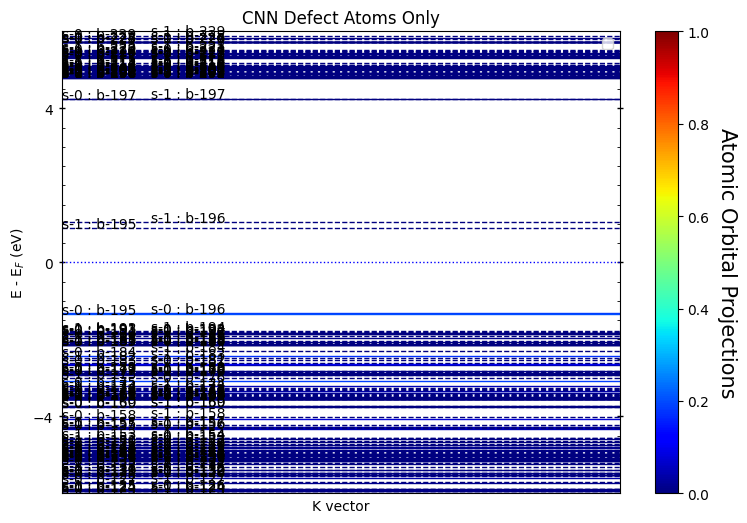


Defect-only analysis:
• Strong red/yellow: Levels with high defect character
• Blue/weak colors: Levels with little defect involvement
• Gap states: Defect-induced levels within the hBN bandgap


In [3]:
# Focus only on the CNN defect atoms
defect_atoms = [96, 97]  # The core defect atoms

print("Plotting atomic levels for defect atoms only...")
print(f"Defect atoms: {defect_atoms}")

pyprocar.bandsplot(
    dirname=HBNCNCN_DATA_DIR,
    code="vasp",
    mode="atomic",
    elimit=[-6, 6],                # Same energy range for comparison
    clim=[0, 1.0],                 # Higher color scale to highlight defect contributions
    atoms=defect_atoms,
    fermi=-3.4842,
    title="CNN Defect Atoms Only"
)

print("\nDefect-only analysis:")
print("• Strong red/yellow: Levels with high defect character")
print("• Blue/weak colors: Levels with little defect involvement")
print("• Gap states: Defect-induced levels within the hBN bandgap")


### Analyzing Host Material Contributions

Now let's examine the contribution from atoms representing the host hBN material:


Plotting atomic levels for host hBN atoms...
Host atoms: [0, 1, 2, 3, 42, 44]
If you want more detailed logs, set verbose to 2 or more
____________________________________________________________________________________________________
 ____        ____
|  _ \ _   _|  _ \ _ __ ___   ___ __ _ _ __ 
| |_) | | | | |_) | '__/ _ \ / __/ _` | '__|
|  __/| |_| |  __/| | | (_) | (_| (_| | |   
|_|    \__, |_|   |_|  \___/ \___\__,_|_|
       |___/
A Python library for electronic structure pre/post-processing.

Version 6.4.6 created on Mar 6th, 2025

Please cite:
- Uthpala Herath, Pedram Tavadze, Xu He, Eric Bousquet, Sobhit Singh, Francisco Muñoz and Aldo Romero.,
  PyProcar: A Python library for electronic structure pre/post-processing.,
  Computer Physics Communications 251, 107080 (2020).

- L. Lang, P. Tavadze, A. Tellez, E. Bousquet, H. Xu, F. Muñoz, N. Vasquez, U. Herath, and A. H. Romero,
  Expanding PyProcar for new features, maintainability, and reliability.,
  Computer Physics Commun

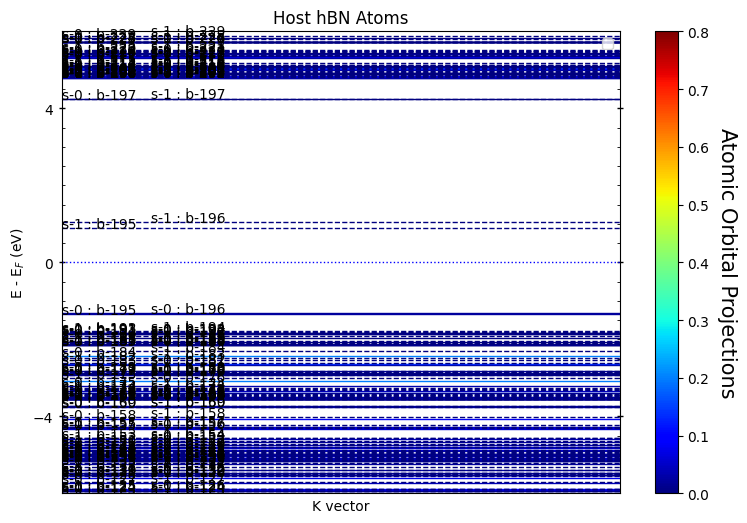


Host material analysis:
• Valence band: Strong contributions around -2 to 0 eV
• Conduction band: Contributions above +3 eV
• Bandgap region: Minimal host atom involvement (0 to +3 eV)
• Band edges: Host atoms dominate valence and conduction band edges


In [4]:
# Focus on host hBN atoms (excluding defect atoms)
host_atoms = [0, 1, 2, 3, 42, 44]  # Representative hBN atoms

print("Plotting atomic levels for host hBN atoms...")
print(f"Host atoms: {host_atoms}")

pyprocar.bandsplot(
    dirname=HBNCNCN_DATA_DIR,
    code="vasp",
    mode="atomic",
    elimit=[-6, 6],
    clim=[0, 0.8],                 # Adjusted color scale for host contributions
    atoms=host_atoms,
    fermi=-3.4842,
    title="Host hBN Atoms"
)

print("\nHost material analysis:")
print("• Valence band: Strong contributions around -2 to 0 eV")
print("• Conduction band: Contributions above +3 eV")  
print("• Bandgap region: Minimal host atom involvement (0 to +3 eV)")
print("• Band edges: Host atoms dominate valence and conduction band edges")


## Summary and Key Insights

### What We Learned from Atomic Level Analysis

Through this tutorial, we demonstrated how atomic energy level plots provide detailed insights into the electronic structure of materials at the single k-point level. For the hBN-CNN system, we discovered:

#### 1. **Defect State Identification**
- **Gap states**: The CNN defect introduces electronic states within the hBN bandgap
- **Localization**: These defect states are primarily localized on the CNN atoms
- **Energy positions**: Defect levels appear in the forbidden energy region of pristine hBN

#### 2. **Host-Defect Interactions**  
- **Valence bands**: Host hBN atoms dominate the valence region (-2 to 0 eV)
- **Conduction bands**: Host atoms also control the conduction band edge (>+3 eV)
- **Hybridization**: Some mixing between defect and host states at band edges

#### 3. **Electronic Structure Modifications**
- **Bandgap engineering**: Defect introduces accessible electronic states
- **Optical properties**: New transitions possible between defect levels
- **Chemical activity**: Modified electronic structure affects reactivity

### Practical Applications

This type of analysis is valuable for:

- **Defect engineering**: Designing materials with specific electronic properties
- **Optoelectronics**: Understanding optical transitions in doped materials  
- **Catalysis**: Identifying active sites and electronic states
- **Quantum materials**: Characterizing localized states for quantum applications

### Key Advantages of Atomic Mode

1. **Atom-specific information**: Directly shows which atoms contribute to each electronic state
2. **Defect analysis**: Excellent for studying point defects and dopants
3. **Chemical insight**: Reveals hybridization and bonding characteristics
4. **Γ-point focus**: Ideal for molecular systems and zone-center analysis

### Best Practices for Atomic Level Plots

1. **Atom selection**: Choose atoms strategically based on chemical intuition
2. **Energy range**: Focus on the relevant energy window (often around Fermi level)
3. **Color scale**: Adjust `clim` to highlight the contributions you want to emphasize
4. **Comparison plots**: Create multiple plots with different atom selections
5. **Interpretation**: Consider both energy positions and atomic character

The atomic mode in PyProcar provides a powerful complement to traditional band structure analysis, offering deep insights into the local electronic structure and chemical bonding in materials.
